# Random Shape in Blender

In [1]:
import math

In [2]:
# mesh arrays
verts = []
faces = []
edges = []
 
#3D supershape parameters
m = 14.23
a = -0.06
b = 2.78
n1 = 0.5
n2 = -.48
n3 = 1.5
 
scale = 3
 
Unum = 50
Vnum = 50
 
Uinc = math.pi / (Unum/2)
Vinc = (math.pi/2)/(Vnum/2)
 
#fill verts array
theta = -math.pi
for i in range (0, Unum + 1):
    phi = -math.pi/2
    r1 = 1/(((abs(math.cos(m*theta/4)/a))**n2+(abs(math.sin(m*theta/4)/b))**n3)**n1)
    for j in range(0,Vnum + 1):
        r2 = 1/(((abs(math.cos(m*phi/4)/a))**n2+(abs(math.sin(m*phi/4)/b))**n3)**n1)
        x = scale * (r1 * math.cos(theta) * r2 * math.cos(phi))
        y = scale * (r1 * math.sin(theta) * r2 * math.cos(phi))
        z = scale * (r2 * math.sin(phi))
 
        vert = (x,y,z) 
        verts.append(vert)
        #increment phi
        phi = phi + Vinc
    #increment theta
    theta = theta + Uinc
 
#fill faces array
count = 0
for i in range (0, (Vnum + 1) *(Unum)):
    if count < Vnum:
        A = i
        B = i+1
        C = (i+(Vnum+1))+1
        D = (i+(Vnum+1))
 
        face = (A,B,C,D)
        faces.append(face)
 
        count = count + 1
    else:
        count = 0

In [3]:
len(verts)

2601

In [4]:
len(edges)

0

In [5]:
len(faces)

2500

# Phrase Matching Algorithm

In [12]:
"""
Visualize Genetic Algorithm to match the target phrase.
Visit my tutorial website for more: https://mofanpy.com/tutorials/
"""
import numpy as np

TARGET_PHRASE = 'Veeramanohar'       # target DNA
POP_SIZE = 300                      # population size
CROSS_RATE = 0.4                    # mating probability (DNA crossover)
MUTATION_RATE = 0.01                # mutation probability
N_GENERATIONS = 1000

DNA_SIZE = len(TARGET_PHRASE)
TARGET_ASCII = np.fromstring(TARGET_PHRASE, dtype=np.uint8)  # convert string to number
ASCII_BOUND = [32, 126]


class GA(object):
    def __init__(self, DNA_size, DNA_bound, cross_rate, mutation_rate, pop_size):
        self.DNA_size = DNA_size
        DNA_bound[1] += 1
        self.DNA_bound = DNA_bound
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.random.randint(*DNA_bound, size=(pop_size, DNA_size)).astype(np.int8)  # int8 for convert to ASCII

    def translateDNA(self, DNA):                 # convert to readable string
        return DNA.tostring().decode('ascii')

    def get_fitness(self):                      # count how many character matches
        match_count = (self.pop == TARGET_ASCII).sum(axis=1)
        return match_count

    def select(self):
        fitness = self.get_fitness() + 1e-4     # add a small amount to avoid all zero fitness
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness/fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                child[point] = np.random.randint(*self.DNA_bound)  # choose a random ASCII index
        return child

    def evolve(self):
        pop = self.select()
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

if __name__ == '__main__':
    ga = GA(DNA_size=DNA_SIZE, DNA_bound=ASCII_BOUND, cross_rate=CROSS_RATE,
            mutation_rate=MUTATION_RATE, pop_size=POP_SIZE)

    for generation in range(N_GENERATIONS):
        fitness = ga.get_fitness()
        best_DNA = ga.pop[np.argmax(fitness)]
        best_phrase = ga.translateDNA(best_DNA)
        print('Gen', generation, ': ', best_phrase)
        if best_phrase == TARGET_PHRASE:
            break
        ga.evolve()

C:\Users\imvee\AppData\Local\Temp/ipykernel_20972/276123648.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  TARGET_ASCII = np.fromstring(TARGET_PHRASE, dtype=np.uint8)  # convert string to number
C:\Users\imvee\AppData\Local\Temp/ipykernel_20972/276123648.py:30: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return DNA.tostring().decode('ascii')
C:\Users\imvee\AppData\Local\Temp/ipykernel_20972/276123648.py:44: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover poin

Gen 0 :  |+0ea7?Ro58%
Gen 1 :  Me_eqm',d~sr
Gen 2 :  Y%eN5)wno9}r
Gen 3 :  Lqvrw{J{ohad
Gen 4 :  Teerg{$qMXar
Gen 5 :  Levra{J{o5ar
Gen 6 :  Leera{${oXar
Gen 7 :  zeevax?nohar
Gen 8 :  zeevax?nohar
Gen 9 :  zeevax?nohar
Gen 10 :  VeeraxwnoPar
Gen 11 :  V8e1an1nohar
Gen 12 :  V8eran1nohar
Gen 13 :  Veera$'no9ar
Gen 14 :  Veeran^noXar
Gen 15 :  VeeranEnoXar
Gen 16 :  Veera@ERohar
Gen 17 :  VeTran$nohar
Gen 18 :  Veeran"noh&r
Gen 19 :  VeeranEno9ar
Gen 20 :  Veera@"nohar
Gen 21 :  Veera."nohar
Gen 22 :  Veera."nohar
Gen 23 :  VeeranEnohar
Gen 24 :  Veera."nohar
Gen 25 :  Veera."nohar
Gen 26 :  Veeran$nohar
Gen 27 :  VeeranEnohar
Gen 28 :  Veera@Jnohar
Gen 29 :  VeeranEnohar
Gen 30 :  Veera@Bnohar
Gen 31 :  Veeran$nohar
Gen 32 :  Veeraf"nohar
Gen 33 :  Veerah$nohar
Gen 34 :  Veera@1nohar
Gen 35 :  Veeran1nohar
Gen 36 :  Veera@anohar
Gen 37 :  Veera@anohar
Gen 38 :  Veera@anohar
Gen 39 :  Veerah"nohar
Gen 40 :  Veeraf"nohar
Gen 41 :  Veeran"nohar
Gen 42 :  VeeranInohar
Gen 43 :  VeeranEnoha

# Generating 3D Points

### Random Colors

In [7]:
import random
import matplotlib.pyplot as plt
from PIL import Image

(225,114,29,97)


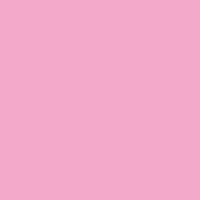

(1,228,102,71)


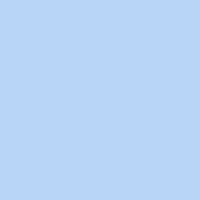

(117,34,239,57)


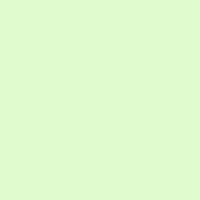

(159,199,120,112)


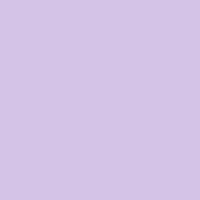

(60,110,114,89)


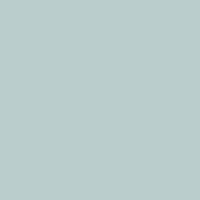

In [8]:
for i in range(5):
    [R,G,B,A]=[random.randint(0,255),random.randint(0,255),random.randint(0,255),random.randint(0,255)]
    img = Image.new('RGBA',(200,200),(R,G,B,A))
    print(f'({R},{B},{G},{A})')
    display(img)

### Random 3D points

In [9]:
EDGES=[]

In [10]:
points = np.mgrid[1:6, 2:5, 8:10]

In [11]:
points.reshape(3, -1).T

array([[1, 2, 8],
       [1, 2, 9],
       [1, 3, 8],
       [1, 3, 9],
       [1, 4, 8],
       [1, 4, 9],
       [2, 2, 8],
       [2, 2, 9],
       [2, 3, 8],
       [2, 3, 9],
       [2, 4, 8],
       [2, 4, 9],
       [3, 2, 8],
       [3, 2, 9],
       [3, 3, 8],
       [3, 3, 9],
       [3, 4, 8],
       [3, 4, 9],
       [4, 2, 8],
       [4, 2, 9],
       [4, 3, 8],
       [4, 3, 9],
       [4, 4, 8],
       [4, 4, 9],
       [5, 2, 8],
       [5, 2, 9],
       [5, 3, 8],
       [5, 3, 9],
       [5, 4, 8],
       [5, 4, 9]])